<a href="https://colab.research.google.com/github/KW-ML/ML_Project/blob/main/code/tsne%2Bpca%2Bsmogn%2Bada%2Bxgboost(SHAP)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,373 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/기계학습팀플/코드/data/바이너리인코딩.csv',encoding='utf-8')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 BOD,...,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타,처리효율
0,860000,0,860000,557225.3,0.0,557225.3,561135.4,0.0,561135.4,131.0,...,0,0,1,12238,12238,1,0,0,0,98.3
1,1590000,100000,1490000,1263583.9,126961.3,1136622.6,1284644.9,148022.3,1136622.6,140.1,...,0,0,1,16172,16172,1,0,1,0,95.9
2,1630000,120000,1510000,1607080.8,150526.6,1456554.2,1607080.8,150526.6,1456554.2,121.9,...,0,0,1,12238,12359,1,0,0,0,97.0
3,900000,0,900000,752384.9,0.0,752384.9,752384.9,0.0,752384.9,145.2,...,0,0,1,12076,12076,1,0,0,1,96.6
4,120000,0,120000,51697.2,0.0,51697.2,52037.6,0.0,52037.6,115.7,...,0,1,0,5479,5478,0,1,0,0,97.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,30,0,30,25.5,0.0,25.5,25.5,0.0,25.5,42.0,...,0,1,1,5847,5847,1,1,1,1,88.1
4276,30,0,30,11.1,0.0,11.1,11.1,0.0,11.1,79.3,...,0,1,1,5524,5524,1,1,1,1,95.8
4277,25,0,25,6.2,0.0,6.2,6.2,0.0,6.2,63.1,...,0,1,1,6095,6095,1,1,1,1,93.7
4278,23,0,23,7.9,0.0,7.9,7.9,0.0,7.9,200.1,...,0,1,1,7988,7988,1,1,1,1,95.4


In [ ]:
df = data.copy()

In [ ]:
X = df.drop(['처리효율','방류 BOD','유입 BOD'],axis = 1)
Y = df['처리효율']
/content/drive/MyDrive/기계학습팀플/코드/data/

In [ ]:
train_low = pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/train_low.csv", encoding = 'utf-8-sig')
test_low =pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/test_low.csv", encoding = 'utf-8-sig')
train_high = pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/train_high.csv", encoding = 'utf-8-sig')
test_high = pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/test_high.csv", encoding = 'utf-8-sig')

In [ ]:
train_low=pd.DataFrame(train_low)
train_high=pd.DataFrame(train_high)

In [ ]:
test_low=pd.DataFrame(test_low)
test_high=pd.DataFrame(test_high)

In [ ]:
high=pd.DataFrame(train_high)
high1=pd.DataFrame(test_high)

In [ ]:
train=pd.concat([train_low,train_high])

In [ ]:
test=pd.concat([test_low,test_high])

In [ ]:
all=pd.concat([train,test])

In [ ]:
all_x=pd.concat([high,high1])

In [ ]:
train_X=train.drop(['처리효율'],axis=1)
train_Y=train['처리효율']

In [ ]:
train.columns

Index(['시설용량', '생물학적', '고도', '유입하수량', '생물학적 유입하수량', '고도 유입하수량', '방류량',
       '생물학적 방류량', '고도 방류량', '유입 COD', '방류 COD', '유입 SS', '방류 SS', '유입 T-N',
       '방류 T-N', '유입 T-P', '방류 T-P', '유입 총대장균군수', '방류 총대장균군수', '처리부하량',
       '연계처리량_분뇨', '연계처리량_축산', '연계처리량_침출수', '연계처리량_기타', '사업비(백만원)',
       '목표수질(BOD)_0', '목표수질(BOD)_1', '목표수질(BOD)_2', '재생에너지 이용률', '총 에너지사용량',
       '총 전력사용량', '자체 에너지사용량', '하수처리량당 (CO2)배출량', '위탁비용', '직원총수(명)', '안전사고건수',
       '시도_0', '시도_1', '시도_2', '시도_3', '시도_4', '운영주체_0', '운영주체_1', '지역구분_0',
       '지역구분_1', '지역구분_2', '수계_0', '수계_1', '수계_2', '준공일_day', '가동개시일_day',
       '방류수소독방법_염소', '방류수소독방법_자외선', '방류수소독방법_오존', '방류수소독방법_기타', '처리효율'],
      dtype='object')

In [ ]:
df_scaled

array([[-0.1117715 , -0.03388287, -0.11339591, ...,  0.41805182,
         0.40978438, -2.66137794],
       [-0.11196075, -0.03729504, -0.11339591, ...,  0.41805182,
         0.40978438, -1.88364033],
       [-0.11187473, -0.04815194, -0.11268579, ...,  0.41805182,
         0.40978438, -2.12294421],
       ...,
       [-0.11221882, -0.04815194, -0.11304085, ...,  0.41805182,
         0.40978438,  0.53931146],
       [-0.02223985, -0.04815194, -0.02019313, ..., -2.39204797,
        -2.44030778,  0.83844131],
       [-0.11221882, -0.04815194, -0.11304085, ...,  0.41805182,
        -2.44030778, -0.11877421]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    
scaler.fit(train[['시설용량', '생물학적', '고도', '유입하수량', '생물학적 유입하수량', '고도 유입하수량', '방류량',
       '생물학적 방류량', '고도 방류량', '유입 COD', '방류 COD', '유입 SS', '방류 SS', '유입 T-N',
       '방류 T-N', '유입 T-P', '방류 T-P', '유입 총대장균군수', '방류 총대장균군수', '처리부하량',
       '연계처리량_분뇨', '연계처리량_축산', '연계처리량_침출수', '연계처리량_기타', '사업비(백만원)',
       '목표수질(BOD)_0', '목표수질(BOD)_1', '목표수질(BOD)_2', '재생에너지 이용률', '총 에너지사용량',
       '총 전력사용량', '자체 에너지사용량', '하수처리량당 (CO2)배출량', '위탁비용', '직원총수(명)', '안전사고건수',
       '시도_0', '시도_1', '시도_2', '시도_3', '시도_4', '운영주체_0', '운영주체_1', '지역구분_0',
       '지역구분_1', '지역구분_2', '수계_0', '수계_1', '수계_2', '준공일_day', '가동개시일_day',
       '방류수소독방법_염소', '방류수소독방법_자외선', '방류수소독방법_오존', '방류수소독방법_기타']])
df_scaled = scaler.transform(train[['시설용량', '생물학적', '고도', '유입하수량', '생물학적 유입하수량', '고도 유입하수량', '방류량',
       '생물학적 방류량', '고도 방류량', '유입 COD', '방류 COD', '유입 SS', '방류 SS', '유입 T-N',
       '방류 T-N', '유입 T-P', '방류 T-P', '유입 총대장균군수', '방류 총대장균군수', '처리부하량',
       '연계처리량_분뇨', '연계처리량_축산', '연계처리량_침출수', '연계처리량_기타', '사업비(백만원)',
       '목표수질(BOD)_0', '목표수질(BOD)_1', '목표수질(BOD)_2', '재생에너지 이용률', '총 에너지사용량',
       '총 전력사용량', '자체 에너지사용량', '하수처리량당 (CO2)배출량', '위탁비용', '직원총수(명)', '안전사고건수',
       '시도_0', '시도_1', '시도_2', '시도_3', '시도_4', '운영주체_0', '운영주체_1', '지역구분_0',
       '지역구분_1', '지역구분_2', '수계_0', '수계_1', '수계_2', '준공일_day', '가동개시일_day',
       '방류수소독방법_염소', '방류수소독방법_자외선', '방류수소독방법_오존', '방류수소독방법_기타']])
df_scaled = pd.DataFrame(df_scaled, columns= ['시설용량', '생물학적', '고도', '유입하수량', '생물학적 유입하수량', '고도 유입하수량', '방류량',
       '생물학적 방류량', '고도 방류량', '유입 COD', '방류 COD', '유입 SS', '방류 SS', '유입 T-N',
       '방류 T-N', '유입 T-P', '방류 T-P', '유입 총대장균군수', '방류 총대장균군수', '처리부하량',
       '연계처리량_분뇨', '연계처리량_축산', '연계처리량_침출수', '연계처리량_기타', '사업비(백만원)',
       '목표수질(BOD)_0', '목표수질(BOD)_1', '목표수질(BOD)_2', '재생에너지 이용률', '총 에너지사용량',
       '총 전력사용량', '자체 에너지사용량', '하수처리량당 (CO2)배출량', '위탁비용', '직원총수(명)', '안전사고건수',
       '시도_0', '시도_1', '시도_2', '시도_3', '시도_4', '운영주체_0', '운영주체_1', '지역구분_0',
       '지역구분_1', '지역구분_2', '수계_0', '수계_1', '수계_2', '준공일_day', '가동개시일_day',
       '방류수소독방법_염소', '방류수소독방법_자외선', '방류수소독방법_오존', '방류수소독방법_기타'])

df_scaled['target'] =np.array(train['처리효율'])


In [ ]:
df_scaled

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 COD,...,지역구분_2,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타
0,-0.111772,-0.033883,-0.113396,-0.107240,-0.026961,-0.110569,-0.103813,-0.026361,-0.107501,-1.461869,...,1.127830,1.328997,-0.821898,-1.090977,1.444426,1.463154,0.410761,0.170251,0.418052,0.409784
1,-0.111961,-0.037295,-0.113396,-0.107362,-0.028686,-0.110569,-0.103938,-0.027978,-0.107501,-0.972922,...,1.127830,1.328997,-0.821898,-1.090977,1.435449,1.454226,0.410761,0.170251,0.418052,0.409784
2,-0.111875,-0.048152,-0.112686,-0.107069,-0.034871,-0.109804,-0.103622,-0.033774,-0.106696,-0.262563,...,1.127830,1.328997,-0.821898,-1.090977,0.281365,0.306650,0.410761,0.170251,0.418052,0.409784
3,-0.111944,-0.048152,-0.112757,-0.107187,-0.034871,-0.109928,-0.103794,-0.033774,-0.106878,-0.225662,...,1.127830,1.328997,-0.821898,0.916609,0.489647,0.513758,0.410761,0.170251,0.418052,0.409784
4,-0.111789,-0.048152,-0.112597,-0.107481,-0.034871,-0.110237,-0.104060,-0.033774,-0.107159,-0.968309,...,1.127830,-0.752447,1.216696,-1.090977,0.280916,0.306204,0.410761,0.170251,0.418052,0.409784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,-0.104133,-0.048152,-0.104697,-0.097854,-0.034871,-0.100132,-0.094207,-0.033774,-0.096752,0.187176,...,-0.886659,-0.752447,1.216696,-1.090977,-0.266275,-0.237902,0.410761,0.170251,0.418052,0.409784
3404,-0.083315,-0.048152,-0.083216,-0.084325,-0.034871,-0.085930,-0.082750,-0.033774,-0.084652,-0.121876,...,1.127830,-0.752447,-0.821898,0.916609,-1.351680,-1.555985,0.410761,0.170251,0.418052,0.409784
3405,-0.112219,-0.048152,-0.113041,-0.107418,-0.034871,-0.110171,-0.103996,-0.033774,-0.107091,-0.578534,...,1.127830,-0.752447,1.216696,-1.090977,0.782769,0.805228,0.410761,0.170251,0.418052,0.409784
3406,-0.022240,-0.048152,-0.020193,-0.014412,-0.034871,-0.012545,-0.021272,-0.033774,-0.019719,-0.746899,...,1.127830,-0.752447,1.216696,-1.090977,1.123024,1.149367,-2.434508,0.170251,-2.392048,-2.440308


In [ ]:
from sklearn.decomposition import PCA

# 2차원으로 차원 축소, target 정보는 제외
pca = PCA(n_components = 2)
pca.fit(df_scaled.iloc[:,:-1])
 
# pca transform 후 데이터프레임으로 자료형 변경
df_pca = pca.transform(df_scaled.iloc[:,:-1])
df_pca = pd.DataFrame(df_pca, columns = ['component 0', 'component 1'])

df_pca

,component 0,component 1
0,-0.713509,1.914480
1,-0.802926,2.648570
2,-0.839838,2.161353
3,-0.910764,2.322977
4,-0.609525,1.111520
...,...,...
3403,-0.540115,0.514071
3404,0.032183,-1.400550
3405,-0.613667,0.910886
3406,1.906210,-5.310006


In [ ]:
print(pca.explained_variance_ratio_)


[0.24866862 0.09532955]


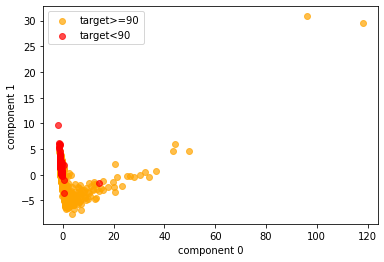

In [ ]:
import matplotlib.pyplot as plt

# class target 정보 불러오기 
df_pca['target'] = df_scaled['target']

# target 별 분리
df_pca_0 = df_pca[df_pca['target']>= 90]
df_pca_1 = df_pca[df_pca['target'] < 90]

# target 별 시각화
plt.scatter(df_pca_0['component 0'], df_pca_0['component 1'], color = 'orange', alpha = 0.7, label = 'target>=90')
plt.scatter(df_pca_1['component 0'], df_pca_1['component 1'], color = 'red', alpha = 0.7, label = 'target<90')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

# tsne


In [ ]:
from sklearn.manifold import TSNE


# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(df_scaled.iloc[:,:-1])

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

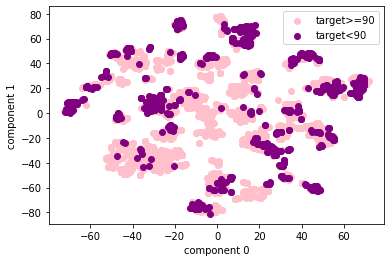

In [ ]:
import matplotlib.pyplot as plt

# class target 정보 불러오기 
tsne_df['target'] = df_scaled['target']


# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] >= 95]
tsne_df_1 = tsne_df[tsne_df['target'] < 95]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'target>=90')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'target<90')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

# 90이상 이하 데이터에 대해 model 예측 확인


In [ ]:
test_high_ada_y=pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_test_high(기존모델에test).csv", encoding = 'utf-8-sig')
test_high_ada_x=pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_test_high(기존모델에test).csv", encoding = 'utf-8-sig')
test_low_ada_y=pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_test_low(기존모델에test).csv", encoding = 'utf-8-sig')
test_low_ada_x=pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_test_low(기존모델에test).csv", encoding = 'utf-8-sig')

X_train=pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/X_train.csv", encoding = 'utf-8-sig')
Y_train=pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/Y_train.csv", encoding = 'utf-8-sig')

In [ ]:
test_low_ada_x=pd.DataFrame(test_low_ada_x)
test_low_ada_y=pd.DataFrame(test_low_ada_y)
test_high_ada_x=pd.DataFrame(test_high_ada_x)
test_high_ada_y=pd.DataFrame(test_high_ada_y)
X_train=pd.DataFrame(X_train)
Y_train=pd.DataFrame(Y_train)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

abreg = AdaBoostRegressor()
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }

score = make_scorer(mean_squared_error)

gridsearch = GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(X_train, Y_train)
print(gridsearch.best_params_)

best_estim=gridsearch.best_estimator_
print(best_estim)

{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 100}
AdaBoostRegressor(learning_rate=0.1, n_estimators=100)


In [ ]:
print(score)

make_scorer(mean_squared_error)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# evaluate adaboost ensemble for regression
from numpy import mean
from numpy import std
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(best_estim, X_train, Y_train, scoring=score, cv=cv, n_jobs=-1, error_score='raise')
# report performance
print(n_scores)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[ 5.17197503  3.92705173  4.20463482  6.501634   10.20109568  3.9983049
  7.43351658  3.95496975  4.67516125  8.89373189  5.21814365  3.47967515
  5.65753817  4.27087224  8.93336249]
MAE: 5.768 (2.071)


In [ ]:
print(gridsearch.best_score_)


0.5629207944573205


In [ ]:
print(n_scores)


[ 5.17197503  3.92705173  4.20463482  6.501634   10.20109568  3.9983049
  7.43351658  3.95496975  4.67516125  8.89373189  5.21814365  3.47967515
  5.65753817  4.27087224  8.93336249]


In [ ]:
import math
from sklearn.metrics import accuracy_score



best_estim.fit(X_train,Y_train)
ytr_pred=best_estim.predict(X_train)
mse = mean_squared_error(ytr_pred,Y_train)
r2 = r2_score(ytr_pred,Y_train)
print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)

ypred=best_estim.predict(test_low_ada_x)
mse1 = mean_squared_error(test_low_ada_y, ypred)
r21 = r2_score(ypred, test_low_ada_y)
rmse1=math.sqrt(mean_squared_error(ypred, test_low_ada_y))
print("MSE: %.2f" % mse1)
print("R2: %.2f" % r21)
print("RMSE: %.2f" %rmse1)
print(r21)


MSE: 3.67
R2: 0.48
MSE: 37.81
R2: -0.53
RMSE: 6.15
-0.5277827437860241


ValueError: ignored

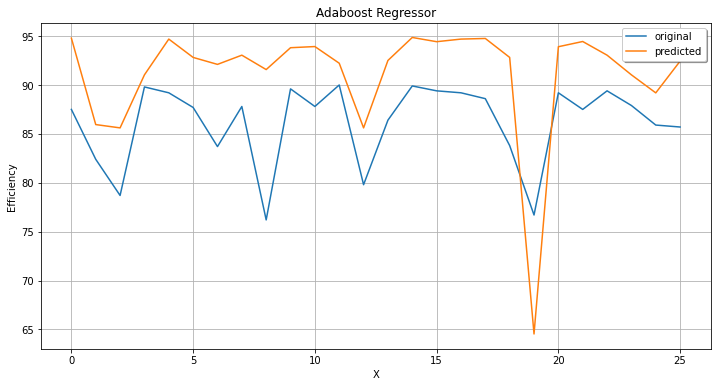

In [ ]:
# visualizing in a plot
x_ax = range(len(test_low_ada_y[:]))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, test_low_ada_y[:], label="original")
plt.plot(x_ax, ypred[:], label="predicted")
plt.title("Adaboost Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

In [ ]:
import math
best_estim.fit(X_train,Y_train)

ytr_pred=best_estim.predict(X_train)
mse = mean_squared_error(ytr_pred,Y_train)
r2 = r2_score(ytr_pred,Y_train)
print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)

ypred=best_estim.predict(test_high_ada_x)
mse = mean_squared_error(test_high_ada_y, ypred)
r2 = r2_score(ypred,test_high_ada_y)
rmse=math.sqrt(mean_squared_error(ypred, test_high_ada_y))
print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)
print("RMSE: %.2f" %rmse)


MSE: 3.56
R2: 0.52
MSE: 2.63
R2: -0.65
RMSE: 1.62


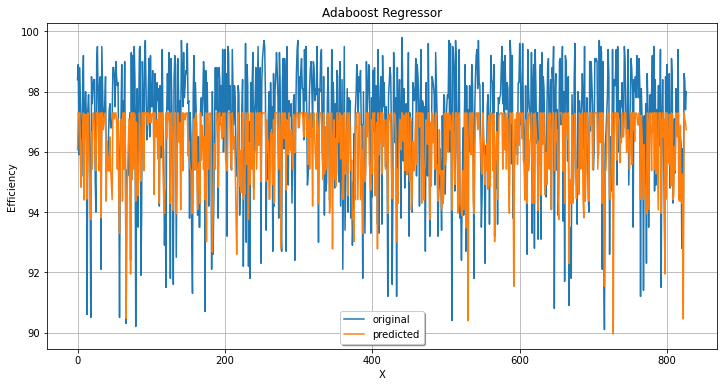

In [ ]:
# visualizing in a plot
x_ax = range(len(test_high_ada_y[:]))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, test_high_ada_y[:], label="original")
plt.plot(x_ax, ypred[:], label="predicted")
plt.title("Adaboost Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

# smogn


In [ ]:
pip install smogn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_Y=train['처리효율'].to_numpy()

In [ ]:
smo.to_csv('smogn.csv',encoding='euc-kr')

In [ ]:
Y_train

array([99. , 97. , 95.6, ..., 99.4, 98.5, 94.6])

In [ ]:
len(train)

3408

In [ ]:
import smogn
smo = smogn.smoter(

    data = train, 
    y ='처리효율',samp_method = 'extreme'
)

r_index: 100%|##########| 398/398 [00:02<00:00, 176.14it/s]


In [ ]:
smo

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 COD,...,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타,처리효율
0,46,46,0,27.500000,27.500000,0.000000,27.500000,27.500000,0.000000,20.400000,...,1,0,0,8073,8073,1,1,1,1,87.400000
1,35,35,0,21.500000,21.500000,0.000000,21.500000,21.500000,0.000000,41.600000,...,1,0,0,8053,8053,1,1,1,1,90.000000
2,40,0,40,35.900000,0.000000,35.900000,36.700000,0.000000,36.700000,72.400000,...,1,0,0,5482,5482,1,1,1,1,89.200000
3,36,0,36,30.100000,0.000000,30.100000,28.400000,0.000000,28.400000,74.000000,...,1,0,1,5946,5946,1,1,1,1,87.900000
4,45,0,45,15.600000,0.000000,15.600000,15.600000,0.000000,15.600000,41.800000,...,0,1,0,5481,5481,1,1,1,1,83.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,30,0,30,27.948904,0.000000,27.948904,27.948904,0.000000,27.948904,90.305735,...,0,0,0,8562,8562,1,1,1,1,95.782359
2386,274,0,274,195.250777,0.000000,195.250777,194.929308,0.000000,194.929308,127.651905,...,0,1,0,622,569,1,1,1,1,98.399593
2387,87,0,87,41.784180,0.000000,41.784180,41.784180,0.000000,41.784180,108.227847,...,0,1,0,5866,5866,1,1,1,1,92.625699
2388,44,0,44,43.911212,0.000000,43.911212,43.869036,0.000000,43.869036,18.313310,...,0,0,0,3382,3380,1,1,1,1,86.452759


In [ ]:
import seaborn


In [ ]:
## plot y distribution 
seaborn.kdeplot(smo['처리효율'], label = "Modified")

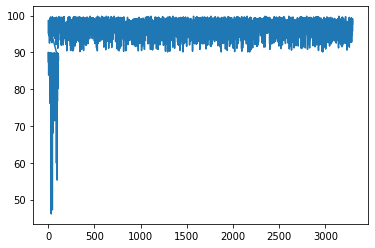

In [ ]:
train['처리효율'].plot()

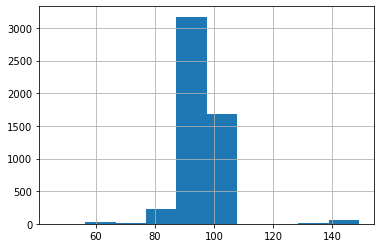

In [ ]:
smo['처리효율'].hist()

In [ ]:
d = smo[smo['처리효율']>100].index
df = smo.drop(d)


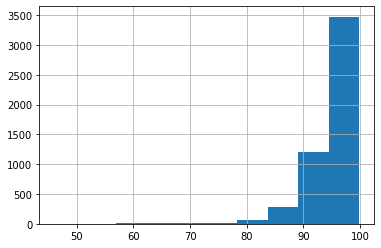

In [ ]:
df['처리효율'].hist()

In [ ]:
df_smogn=pd.concat([train,df],ignore_index=True)

In [ ]:
df

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 BOD,...,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타,처리효율
0,860000,0,860000,5.572253e+05,0.000000,5.572253e+05,5.611354e+05,0.000000,5.611354e+05,131.000000,...,0,0,1,12238,12238,1,0,0,0,98.300000
1,1590000,100000,1490000,1.263584e+06,126961.300000,1.136623e+06,1.284645e+06,148022.300000,1.136623e+06,140.100000,...,0,0,1,16172,16172,1,0,1,0,95.900000
2,1630000,120000,1510000,1.607081e+06,150526.600000,1.456554e+06,1.607081e+06,150526.600000,1.456554e+06,121.900000,...,0,0,1,12238,12359,1,0,0,0,97.000000
3,900000,0,900000,7.523849e+05,0.000000,7.523849e+05,7.523849e+05,0.000000,7.523849e+05,145.200000,...,0,0,1,12076,12076,1,0,0,1,96.600000
4,120000,0,120000,5.169720e+04,0.000000,5.169720e+04,5.203760e+04,0.000000,5.203760e+04,115.700000,...,0,1,0,5479,5478,0,1,0,0,97.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7907,136,0,136,1.226182e+02,0.000000,1.226182e+02,1.224531e+02,0.000000,1.224531e+02,14.077710,...,1,0,0,5287,5287,1,1,1,1,89.277224
7908,80,0,80,6.125003e+01,61.152735,9.729609e-02,5.995315e+01,59.855858,9.729609e-02,106.448589,...,1,0,0,8394,8394,1,1,1,1,91.650096
7909,22,0,22,1.875201e+01,0.000000,1.875201e+01,1.891521e+01,0.000000,1.891521e+01,60.483217,...,0,0,1,5838,5926,1,1,1,1,91.650029
7910,62,0,62,5.423326e+01,0.000000,5.423326e+01,5.423326e+01,0.000000,5.423326e+01,73.157483,...,0,1,0,3539,3539,1,1,1,1,92.650000


In [ ]:
len(data)

4280

In [ ]:
deleteIndex = df[df['처리효율']>100].index
df = df.drop(deleteIndex)

In [ ]:
deleteIndex1 = df[df['처리효율']==0].index
d = d.drop(deleteIndex1)

In [ ]:
deleteIndex1

Int64Index([  20,  223, 1207, 1211, 1311, 1520, 1661, 2049, 2268, 2491, 3130,
            3133, 3318, 3353, 3398, 3447, 3457, 3610, 3976],
           dtype='int64')

In [ ]:
deleteIndex

Int64Index([  20,   82,  223,  567, 1207, 1211, 1311, 1520, 1661, 1990, 1994,
            2049, 2268, 2491, 3130, 3133, 3318, 3353, 3398, 3447, 3457, 3610,
            3959, 3976, 4256, 4257, 4259],
           dtype='int64')

In [ ]:
d.reset_index(drop=True, inplace = True)

In [ ]:
X = df.drop(['처리효율','방류 BOD','유입 BOD'],axis = 1)
#X_outliers=d.drop(['처리효율','방류 BOD','유입 BOD'],axis = 1)

In [ ]:
X_outliers

,시설용량,생물학적,고도,유입하수량,생물학적 유입하수량,고도 유입하수량,방류량,생물학적 방류량,고도 방류량,유입 COD,...,지역구분_2,수계_0,수계_1,수계_2,준공일_day,가동개시일_day,방류수소독방법_염소,방류수소독방법_자외선,방류수소독방법_오존,방류수소독방법_기타
0,430,0,430,854.8,0.0,854.8,854.8,0.0,854.8,88.0,...,0,0,1,1,2421,2389,1,1,1,1
1,30,0,30,30.1,0.0,30.1,30.1,0.0,30.1,13.7,...,1,0,0,1,3247,3247,1,1,1,1
2,150,0,150,73.2,0.0,73.2,73.2,0.0,73.2,64.6,...,0,1,0,0,4048,4048,1,1,1,1
3,80,0,80,60.8,0.0,60.8,60.8,0.0,60.8,58.1,...,0,1,0,0,4566,4566,1,1,1,1
4,40,0,40,11.3,0.0,11.3,11.3,0.0,11.3,3.2,...,1,0,1,0,5829,5829,1,1,1,1
5,45,45,0,57.3,57.3,0.0,57.3,57.3,0.0,62.6,...,1,0,1,1,4018,4018,1,1,1,1
6,45,0,45,121.9,0.0,121.9,121.9,0.0,121.9,71.7,...,1,0,1,1,4570,4570,1,1,1,1
7,40,0,40,128.1,0.0,128.1,128.1,0.0,128.1,84.0,...,1,0,1,1,6576,6576,1,1,1,1


In [ ]:
Y = df['처리효율']
Y

0       98.3
1       95.9
2       97.0
3       96.6
4       97.2
        ... 
4275    88.1
4276    95.8
4277    93.7
4278    95.4
4279    85.7
Name: 처리효율, Length: 4280, dtype: float64

In [ ]:
d

In [ ]:
d_y=d['처리효율']

In [ ]:
d_y

0    55.3
1    68.1
2    46.1
3    47.2
4    28.0
5    59.9
6    56.9
7    59.7
Name: 처리효율, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

isloation_forest
https://partrita.github.io/posts/isolation-forest/

# **AdaBoost** 증강기법 사용(GAN, SMOTE,SMOGN)


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

smote


In [ ]:
smote_csv=pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/SMOTE.csv", encoding = 'utf-8-sig')

In [ ]:
print(len(smote_csv))

6594


gan


In [ ]:
gan_csv=pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/train_gan.csv", encoding = 'utf-8-sig')

In [ ]:
print(len(gan_csv))

6594


smogn


In [ ]:
smogn_csv=pd.read_csv("/content/drive/MyDrive/기계학습팀플/코드/data/smogn.csv", encoding = 'cp949')

In [ ]:
print(len(smogn_csv))

5202


In [ ]:
X_smote=smote_csv.drop(['처리효율'],axis=1)
Y_smote=smote_csv['처리효율']

In [ ]:
X_gan=gan_csv.drop(['처리효율'],axis=1)
Y_gan=gan_csv['처리효율']

In [ ]:
X_smogn=smogn_csv.drop(['처리효율'],axis=1)
Y_smogn=smogn_csv['처리효율']

In [ ]:
X=test.drop(['처리효율'],axis=1)
Y=test['처리효율']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    
scaler.fit(X)
df_scaled = scaler.transform(X)
X = pd.DataFrame(df_scaled, columns= ['시설용량', '생물학적', '고도', '유입하수량', '생물학적 유입하수량', '고도 유입하수량', '방류량',
       '생물학적 방류량', '고도 방류량', '유입 COD', '방류 COD', '유입 SS', '방류 SS', '유입 T-N',
       '방류 T-N', '유입 T-P', '방류 T-P', '유입 총대장균군수', '방류 총대장균군수', '처리부하량',
       '연계처리량_분뇨', '연계처리량_축산', '연계처리량_침출수', '연계처리량_기타', '사업비(백만원)',
       '목표수질(BOD)_0', '목표수질(BOD)_1', '목표수질(BOD)_2', '재생에너지 이용률', '총 에너지사용량',
       '총 전력사용량', '자체 에너지사용량', '하수처리량당 (CO2)배출량', '위탁비용', '직원총수(명)', '안전사고건수',
       '시도_0', '시도_1', '시도_2', '시도_3', '시도_4', '운영주체_0', '운영주체_1', '지역구분_0',
       '지역구분_1', '지역구분_2', '수계_0', '수계_1', '수계_2', '준공일_day', '가동개시일_day',
       '방류수소독방법_염소', '방류수소독방법_자외선', '방류수소독방법_오존', '방류수소독방법_기타'])



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    
scaler.fit(X_smote)
df_scaled1 = scaler.transform(X_smote)
X_smote = pd.DataFrame(df_scaled1, columns= ['시설용량', '생물학적', '고도', '유입하수량', '생물학적 유입하수량', '고도 유입하수량', '방류량',
       '생물학적 방류량', '고도 방류량', '유입 COD', '방류 COD', '유입 SS', '방류 SS', '유입 T-N',
       '방류 T-N', '유입 T-P', '방류 T-P', '유입 총대장균군수', '방류 총대장균군수', '처리부하량',
       '연계처리량_분뇨', '연계처리량_축산', '연계처리량_침출수', '연계처리량_기타', '사업비(백만원)',
       '목표수질(BOD)_0', '목표수질(BOD)_1', '목표수질(BOD)_2', '재생에너지 이용률', '총 에너지사용량',
       '총 전력사용량', '자체 에너지사용량', '하수처리량당 (CO2)배출량', '위탁비용', '직원총수(명)', '안전사고건수',
       '시도_0', '시도_1', '시도_2', '시도_3', '시도_4', '운영주체_0', '운영주체_1', '지역구분_0',
       '지역구분_1', '지역구분_2', '수계_0', '수계_1', '수계_2', '준공일_day', '가동개시일_day',
       '방류수소독방법_염소', '방류수소독방법_자외선', '방류수소독방법_오존', '방류수소독방법_기타'])



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    
scaler.fit(X_gan)
df_scaled1 = scaler.transform(X_gan)
X_gan = pd.DataFrame(df_scaled1, columns= ['시설용량', '생물학적', '고도', '유입하수량', '생물학적 유입하수량', '고도 유입하수량', '방류량',
       '생물학적 방류량', '고도 방류량', '유입 COD', '방류 COD', '유입 SS', '방류 SS', '유입 T-N',
       '방류 T-N', '유입 T-P', '방류 T-P', '유입 총대장균군수', '방류 총대장균군수', '처리부하량',
       '연계처리량_분뇨', '연계처리량_축산', '연계처리량_침출수', '연계처리량_기타', '사업비(백만원)',
       '목표수질(BOD)_0', '목표수질(BOD)_1', '목표수질(BOD)_2', '재생에너지 이용률', '총 에너지사용량',
       '총 전력사용량', '자체 에너지사용량', '하수처리량당 (CO2)배출량', '위탁비용', '직원총수(명)', '안전사고건수',
       '시도_0', '시도_1', '시도_2', '시도_3', '시도_4', '운영주체_0', '운영주체_1', '지역구분_0',
       '지역구분_1', '지역구분_2', '수계_0', '수계_1', '수계_2', '준공일_day', '가동개시일_day',
       '방류수소독방법_염소', '방류수소독방법_자외선', '방류수소독방법_오존', '방류수소독방법_기타'])



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    
scaler.fit(X_smogn)
df_scaled1 = scaler.transform(X_smogn)
X_smogn = pd.DataFrame(df_scaled1, columns= ['시설용량', '생물학적', '고도', '유입하수량', '생물학적 유입하수량', '고도 유입하수량', '방류량',
       '생물학적 방류량', '고도 방류량', '유입 COD', '방류 COD', '유입 SS', '방류 SS', '유입 T-N',
       '방류 T-N', '유입 T-P', '방류 T-P', '유입 총대장균군수', '방류 총대장균군수', '처리부하량',
       '연계처리량_분뇨', '연계처리량_축산', '연계처리량_침출수', '연계처리량_기타', '사업비(백만원)',
       '목표수질(BOD)_0', '목표수질(BOD)_1', '목표수질(BOD)_2', '재생에너지 이용률', '총 에너지사용량',
       '총 전력사용량', '자체 에너지사용량', '하수처리량당 (CO2)배출량', '위탁비용', '직원총수(명)', '안전사고건수',
       '시도_0', '시도_1', '시도_2', '시도_3', '시도_4', '운영주체_0', '운영주체_1', '지역구분_0',
       '지역구분_1', '지역구분_2', '수계_0', '수계_1', '수계_2', '준공일_day', '가동개시일_day',
       '방류수소독방법_염소', '방류수소독방법_자외선', '방류수소독방법_오존', '방류수소독방법_기타'])



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    
scaler.fit(X_smote)
df_scaled1 = scaler.transform(X_smote)
X_smote = pd.DataFrame(df_scaled1, columns= ['시설용량', '생물학적', '고도', '유입하수량', '생물학적 유입하수량', '고도 유입하수량', '방류량',
       '생물학적 방류량', '고도 방류량', '유입 COD', '방류 COD', '유입 SS', '방류 SS', '유입 T-N',
       '방류 T-N', '유입 T-P', '방류 T-P', '유입 총대장균군수', '방류 총대장균군수', '처리부하량',
       '연계처리량_분뇨', '연계처리량_축산', '연계처리량_침출수', '연계처리량_기타', '사업비(백만원)',
       '목표수질(BOD)_0', '목표수질(BOD)_1', '목표수질(BOD)_2', '재생에너지 이용률', '총 에너지사용량',
       '총 전력사용량', '자체 에너지사용량', '하수처리량당 (CO2)배출량', '위탁비용', '직원총수(명)', '안전사고건수',
       '시도_0', '시도_1', '시도_2', '시도_3', '시도_4', '운영주체_0', '운영주체_1', '지역구분_0',
       '지역구분_1', '지역구분_2', '수계_0', '수계_1', '수계_2', '준공일_day', '가동개시일_day',
       '방류수소독방법_염소', '방류수소독방법_자외선', '방류수소독방법_오존', '방류수소독방법_기타'])



In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_gan, Y_gan, test_size=0.3)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_smogn, Y_smogn, test_size=0.3)
#X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_smote, Y_smote, test_size=0.3)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

abreg = AdaBoostRegressor()
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }

score = make_scorer(mean_squared_error)

gridsearch = GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(X_train1, Y_train1)
print(gridsearch.best_params_)

best_estim=gridsearch.best_estimator_
print(best_estim)

{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50}
AdaBoostRegressor(learning_rate=0.5, loss='exponential')


MSE: 127.70
R2: -0.38
MSE: 139.75
R2: -6.94
RMSE: 11.82


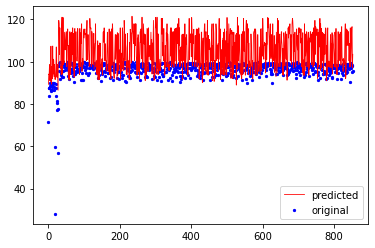

In [ ]:
import math
best_estim.fit(X_train1,Y_train1)

ytr_pred=best_estim.predict(X_train1)
mse = mean_squared_error(ytr_pred,Y_train1)
r2 = r2_score(ytr_pred,Y_train1)
print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)

ypred=best_estim.predict(X)
mse = mean_squared_error(Y, ypred)
r2 = r2_score(Y, ypred)
rmse=math.sqrt(mean_squared_error(ypred, Y))
print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)
print("RMSE: %.2f" %rmse)

x_ax = range(len(Y))
plt.scatter(x_ax, Y[:], s=5, color="blue", label="original")
plt.plot(x_ax, ypred[:], lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

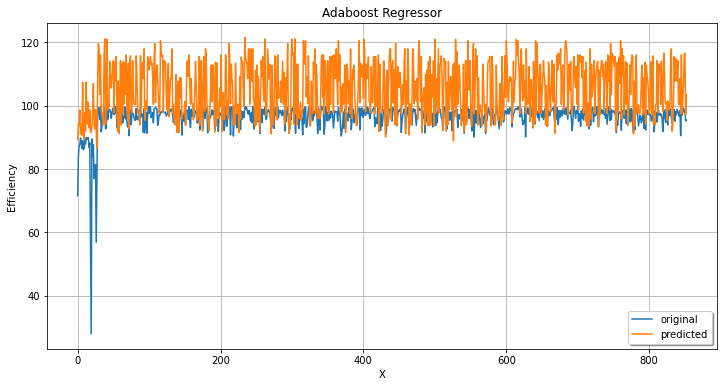

In [ ]:
# visualizing in a plot
x_ax = range(len(Y[:]))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y[:], label="original")
plt.plot(x_ax, ypred[:], label="predicted")
plt.title("Adaboost Regressor")
plt.xlabel('X')
plt.ylabel('Efficiency')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

# **XGBoost + SHAP**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.0 MB/s 


In [ ]:
import xgboost
import shap

In [ ]:
from sklearn.model_selection import train_test_split

X11=all.drop(['처리효율', '생물학적', '고도', '유입하수량', '생물학적 유입하수량', '고도 유입하수량', '방류량',
       '생물학적 방류량', '고도 방류량', '유입 COD', '방류 COD', '유입 SS', '방류 SS', '유입 T-N',
       '방류 T-N', '유입 T-P', '방류 T-P', '유입 총대장균군수', '방류 총대장균군수','처리부하량'],axis=1)
Y11=all['처리효율']
X_train11, X_test11, Y_train11, Y_test11 = train_test_split(X11, Y11, test_size=0.3)

In [ ]:
all['시도_4']

0      0
1      0
2      1
3      0
4      0
      ..
820    1
821    0
822    0
823    0
824    1
Name: 시도_4, Length: 4261, dtype: int64

In [ ]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

#X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target ,test_size=0.1)
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train11), len(X_test11))
xgb_model.fit(X_train11,Y_train11)

2982 1279
[12:37:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

<Figure size 3600x5040 with 0 Axes>

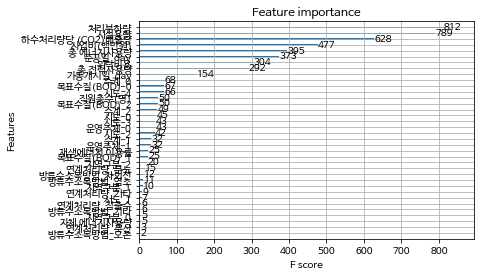

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(50,70))
xgboost.plot_importance(xgb_model)

In [ ]:
predictions = xgb_model.predict(X_test11)
predictions

array([93.95237, 96.53506, 95.90624, ..., 93.80204, 97.03144, 95.98838],
      dtype=float32)

In [ ]:
r_sq = xgb_model.score(X_train11, Y_train11)
print(r_sq)
print(explained_variance_score(predictions,Y_test11))

0.8485211208484822
-0.8061909780707281


shap

In [ ]:
Y_train11[Y_train11<50]

19    28.0
32    46.1
44    47.2
Name: 처리효율, dtype: float64

In [ ]:
Y_train11[Y_train11<50].index

Int64Index([19, 32, 44], dtype='int64')

In [ ]:
# train an XGBoost model
#X, y = shap.datasets.boston()
#model = xgboost.XGBRegressor().fit(X_train, Y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train11)

# visualize the first prediction's explanation


In [ ]:
X_train11.reindex()
Y_train11.reindex()

405     97.1
2385    98.7
1719    91.9
389     96.1
179     97.5
        ... 
965     95.3
10      95.7
1815    98.9
1202    98.9
782     94.6
Name: 처리효율, Length: 2982, dtype: float64

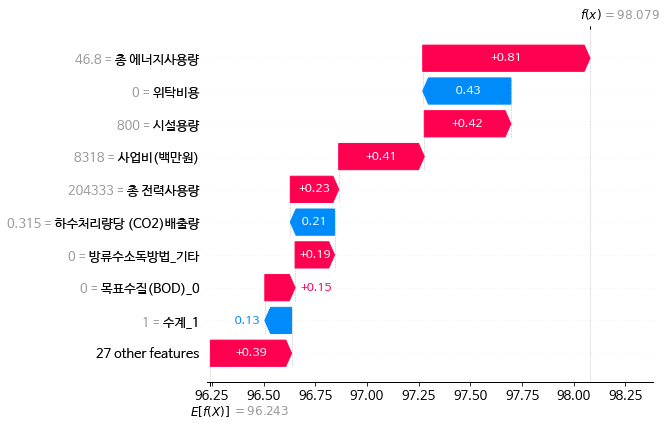

In [ ]:
shap.plots.waterfall(shap_values[44])

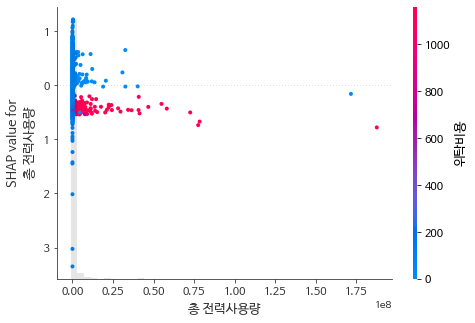

In [ ]:
shap.plots.scatter(shap_values[:,"총 전력사용량"], color=shap_values)

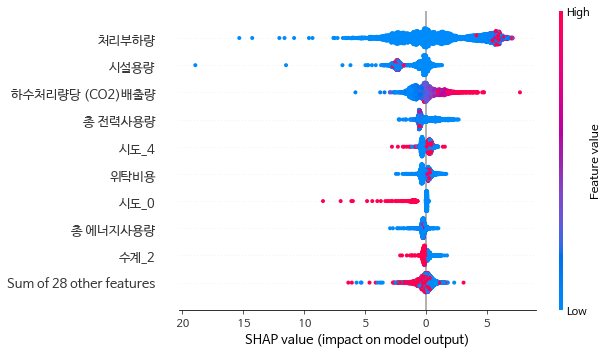

In [ ]:
shap.plots.beeswarm(shap_values)

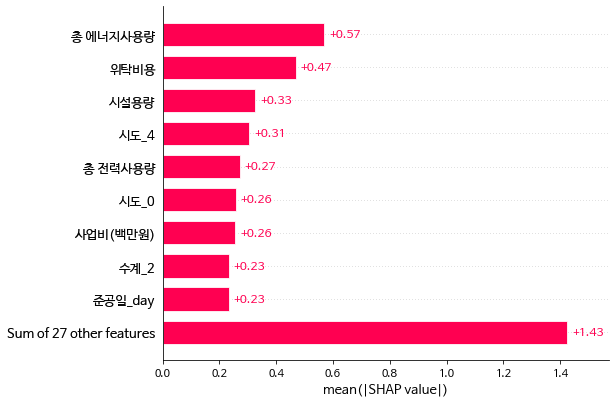

In [ ]:
shap.plots.bar(shap_values)

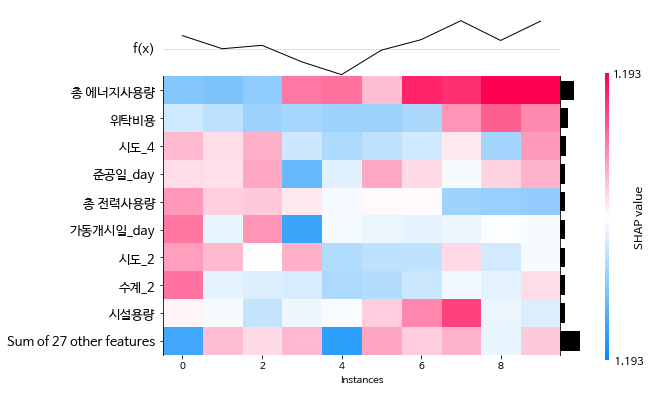

In [ ]:
shap.plots.heatmap(shap_values[:10])
